# Subspace Digital Twin, Parameter Selection Under Uncertainty

*BlockScience, April 2024*

Here we execute the PSUU framework for the subspace economic model. 

For more information see the methodology document by Danilo: https://hackmd.io/iFeP7NemRH--KtWbPP_W0w?view

## Part 1. Architecture Overview

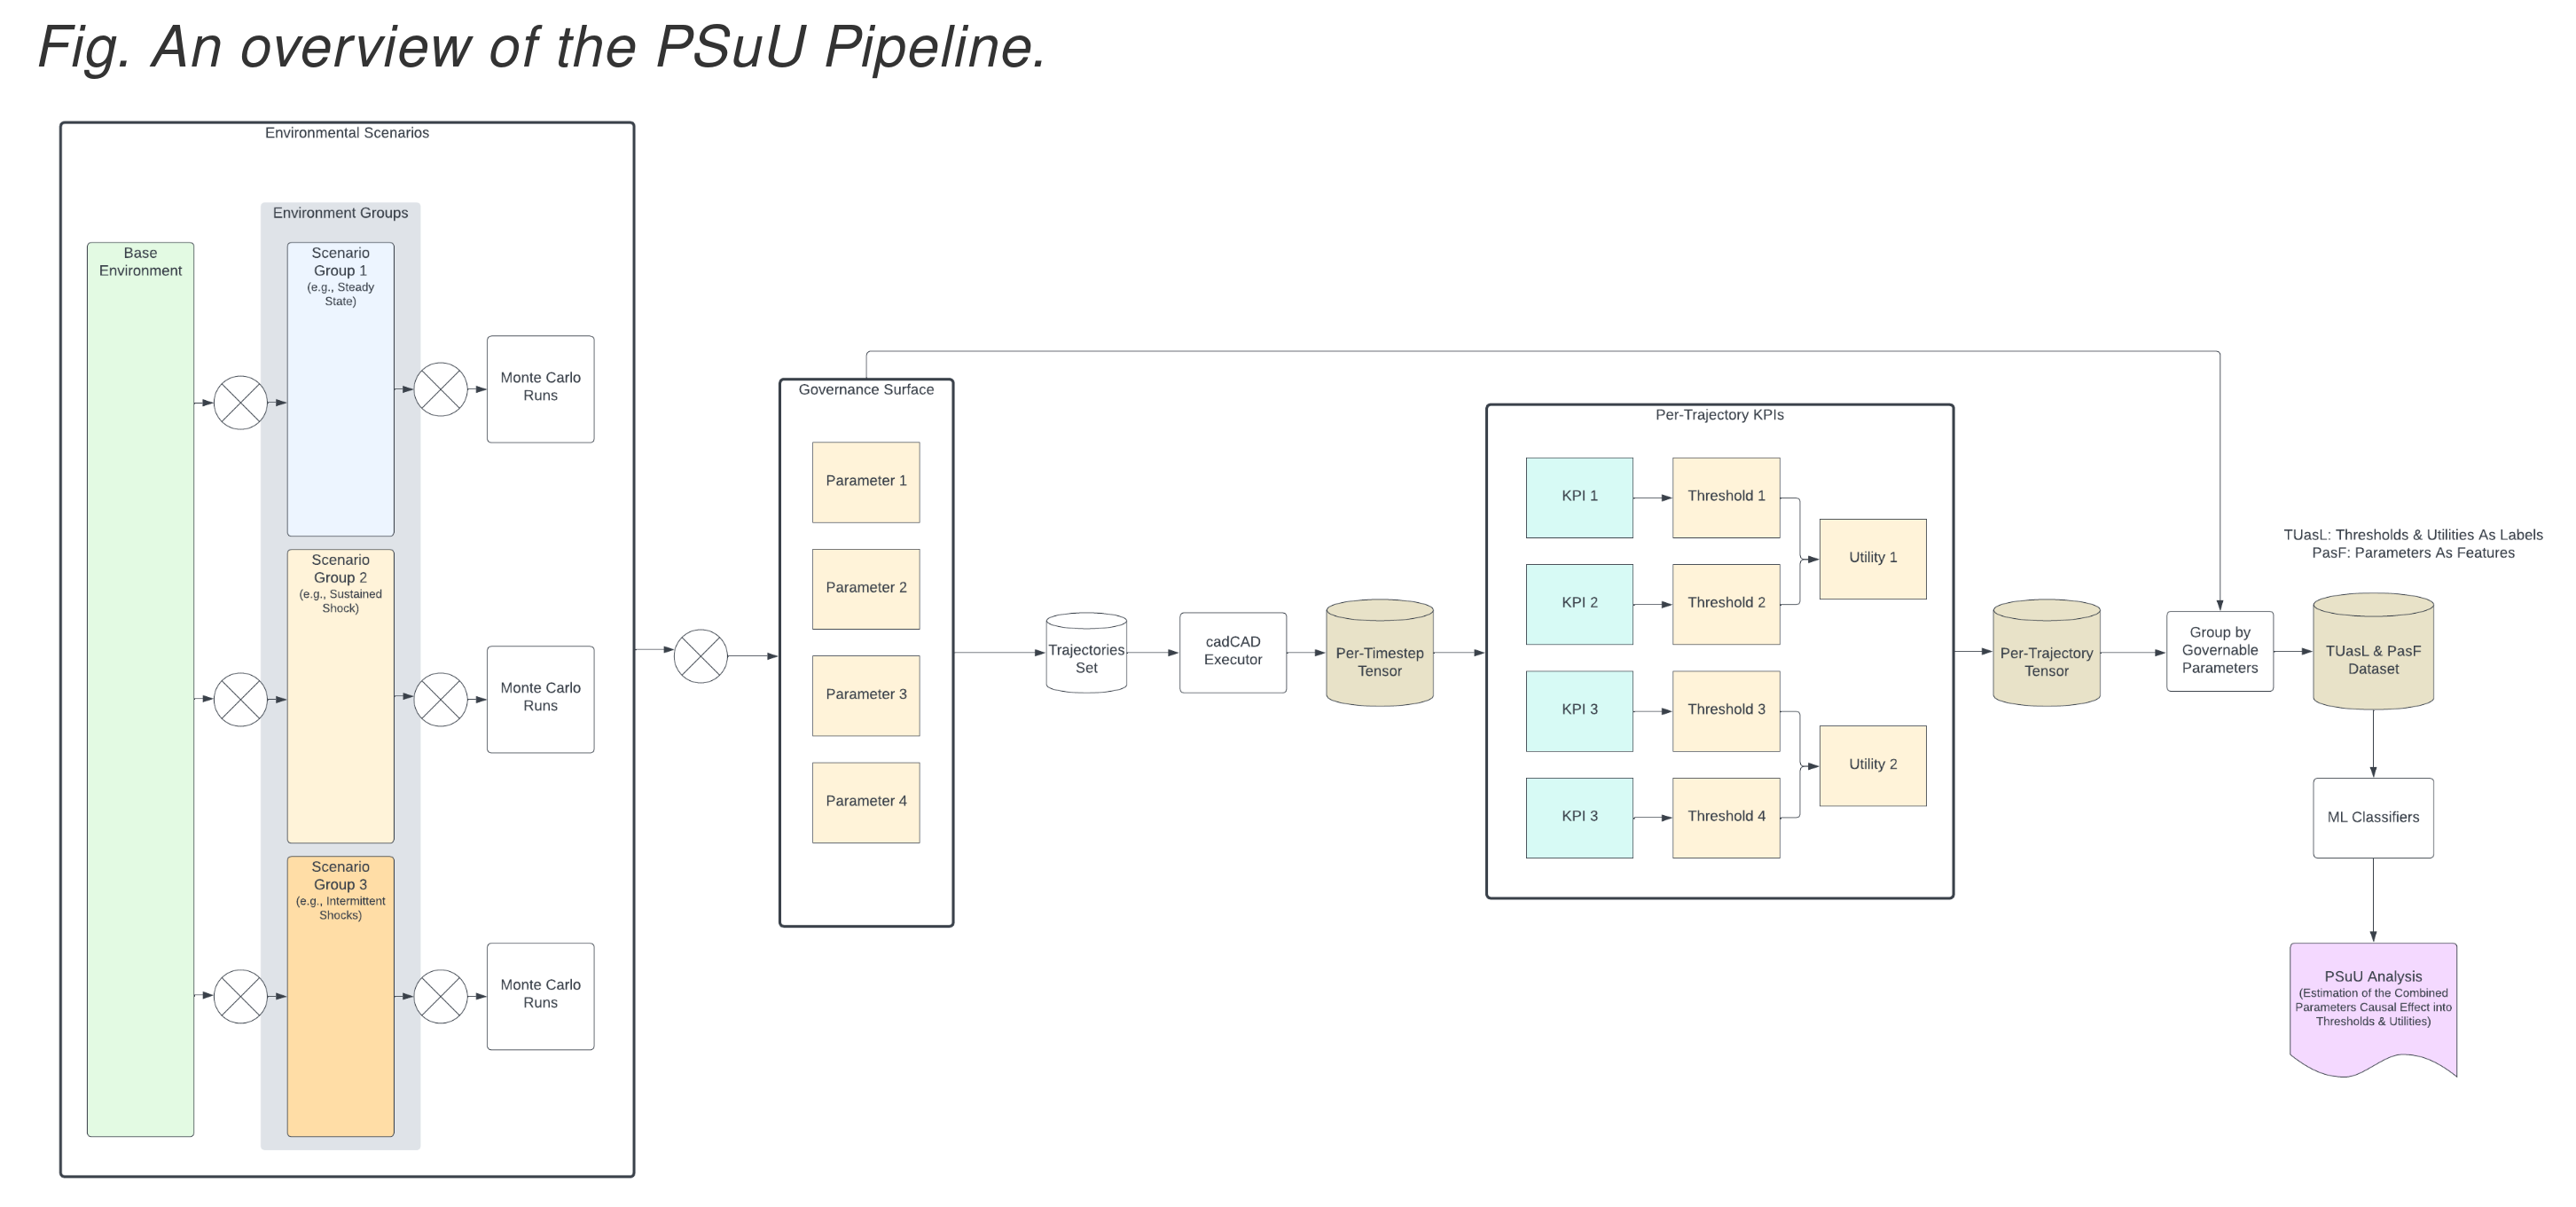

## Part 2. Loading and Cleaning the Per-Timestep Tensor

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)

import sys
sys.path.append('../../')

from glob import glob

latest = sorted(glob("../data/simulations/psuu-2024*"))[-1]

sim_df = pd.read_pickle(latest, compression='gzip')

In [5]:
latest

'../data/simulations/psuu-2024-04-10_11-33-45.pkl.gz'

In [6]:
sim_df

timestep  days_passed  delta_days  delta_blocks  blocks_passed  \
0             0          0.0         0.0           0.0            0.0   
15            1          1.0         1.0       14400.0        14400.0   
30            2          2.0         1.0       14400.0        28800.0   
45            3          3.0         1.0       14400.0        43200.0   
60            4          4.0         1.0       14400.0        57600.0   
...         ...          ...         ...           ...            ...   
65703      1092       1092.0         1.0       14400.0     15724800.0   
65718      1093       1093.0         1.0       14400.0     15739200.0   
65733      1094       1094.0         1.0       14400.0     15753600.0   
65748      1095       1095.0         1.0       14400.0     15768000.0   
65763      1096       1096.0         1.0       14400.0     15782400.0   

       circulating_supply   user_supply  issued_supply  sum_of_stocks  \
0            2.915000e+08  0.000000e+00   0.000000e+00   0.000000e+00   
15           5.830043e+08  5.830043e+08   6.218043e+08   1.000000e+09   
30           4.327252e+08  5.830086e+08   6.218086e+08   1.000000e+09   
45           3.012497e+08  5.830130e+08   6.218130e+08   1.000000e+09   
60           2.291323e+08  5.830173e+08   6.218173e+08   1.000000e+09   
...                   ...           ...            ...            ...   
65703        9.775679e+06  8.385874e+08   6.296624e+08   1.000000e+09   
65718        7.435328e+06  8.385946e+08   6.296696e+08   1.000000e+09   
65733        6.125576e+06  8.386018e+08   6.296768e+08   1.000000e+09   
65748        4.859883e+06  8.386090e+08   6.296840e+08   1.000000e+09   
65763        4.406277e+06  8.386162e+08   6.296912e+08   1.000000e+09   

       earned_supply  earned_minus_burned_supply  total_supply  \
0                0.0                         0.0  0.000000e+00   
15               0.0                         0.0  6.218043e+08   
30               0.0                         0.0  6.218086e+08   
45               0.0                         0.0  6.218130e+08   
60               0.0                         0.0  6.218173e+08   
...              ...                         ...           ...   
65703            0.0                         0.0  6.296624e+08   
65718            0.0                         0.0  6.296696e+08   
65733            0.0                         0.0  6.296768e+08   
65748            0.0                         0.0  6.296840e+08   
65763            0.0                         0.0  6.296912e+08   

       block_utilization  compute_fee_volume  storage_fee_volume  \
0                    0.0        0.000000e+00                 0.0   
15                   0.0        1.000000e-18                 0.0   
30                   0.0        1.000000e-18                 0.0   
45                   0.0        1.000000e-18                 0.0   
60                   0.0        1.000000e-18                 0.0   
...                  ...                 ...                 ...   
65703                0.0        1.000000e-18                 0.0   
65718                0.0        1.000000e-18                 0.0   
65733                0.0        1.000000e-18                 0.0   
65748                0.0        1.000000e-18                 0.0   
65763                0.0        1.000000e-18                 0.0   

       rewards_to_nominators  per_recipient_reward  proposer_bonus_reward  \
0                        0.0                   0.0                    0.0   
15                       0.0                   0.0                    0.0   
30                       0.0                   0.0                    0.0   
45                       0.0                   0.0                    0.0   
60                       0.0                   0.0                    0.0   
...                      ...                   ...                    ...   
65703                    0.0                   0.0                    0.0   
65718                    0.

Check number of years per simulation.

In [7]:
sim_df['days_passed'].max() / 365

3.0027397260273974

Check percentage of total supply issued on average.

In [10]:
from subspace_model.const import MAX_CREDIT_ISSUANCE

sim_df['allocated_tokens'].max() / MAX_CREDIT_ISSUANCE

0.539225

In [11]:
sim_df

timestep  days_passed  delta_days  delta_blocks  blocks_passed  \
0             0          0.0         0.0           0.0            0.0   
15            1          1.0         1.0       14400.0        14400.0   
30            2          2.0         1.0       14400.0        28800.0   
45            3          3.0         1.0       14400.0        43200.0   
60            4          4.0         1.0       14400.0        57600.0   
...         ...          ...         ...           ...            ...   
65703      1092       1092.0         1.0       14400.0     15724800.0   
65718      1093       1093.0         1.0       14400.0     15739200.0   
65733      1094       1094.0         1.0       14400.0     15753600.0   
65748      1095       1095.0         1.0       14400.0     15768000.0   
65763      1096       1096.0         1.0       14400.0     15782400.0   

       circulating_supply   user_supply  issued_supply  sum_of_stocks  \
0            2.915000e+08  0.000000e+00   0.000000e+00   0.000000e+00   
15           5.830043e+08  5.830043e+08   6.218043e+08   1.000000e+09   
30           4.327252e+08  5.830086e+08   6.218086e+08   1.000000e+09   
45           3.012497e+08  5.830130e+08   6.218130e+08   1.000000e+09   
60           2.291323e+08  5.830173e+08   6.218173e+08   1.000000e+09   
...                   ...           ...            ...            ...   
65703        9.775679e+06  8.385874e+08   6.296624e+08   1.000000e+09   
65718        7.435328e+06  8.385946e+08   6.296696e+08   1.000000e+09   
65733        6.125576e+06  8.386018e+08   6.296768e+08   1.000000e+09   
65748        4.859883e+06  8.386090e+08   6.296840e+08   1.000000e+09   
65763        4.406277e+06  8.386162e+08   6.296912e+08   1.000000e+09   

       earned_supply  earned_minus_burned_supply  total_supply  \
0                0.0                         0.0  0.000000e+00   
15               0.0                         0.0  6.218043e+08   
30               0.0                         0.0  6.218086e+08   
45               0.0                         0.0  6.218130e+08   
60               0.0                         0.0  6.218173e+08   
...              ...                         ...           ...   
65703            0.0                         0.0  6.296624e+08   
65718            0.0                         0.0  6.296696e+08   
65733            0.0                         0.0  6.296768e+08   
65748            0.0                         0.0  6.296840e+08   
65763            0.0                         0.0  6.296912e+08   

       block_utilization  compute_fee_volume  storage_fee_volume  \
0                    0.0        0.000000e+00                 0.0   
15                   0.0        1.000000e-18                 0.0   
30                   0.0        1.000000e-18                 0.0   
45                   0.0        1.000000e-18                 0.0   
60                   0.0        1.000000e-18                 0.0   
...                  ...                 ...                 ...   
65703                0.0        1.000000e-18                 0.0   
65718                0.0        1.000000e-18                 0.0   
65733                0.0        1.000000e-18                 0.0   
65748                0.0        1.000000e-18                 0.0   
65763                0.0        1.000000e-18                 0.0   

       rewards_to_nominators  per_recipient_reward  proposer_bonus_reward  \
0                        0.0                   0.0                    0.0   
15                       0.0                   0.0                    0.0   
30                       0.0                   0.0                    0.0   
45                       0.0                   0.0                    0.0   
60                       0.0                   0.0                    0.0   
...                      ...                   ...                    ...   
65703                    0.0                   0.0                    0.0   
65718                    0.

Explode the reference subsidy parameter values.

In [12]:
import re

# Function to parse a single row of subsidy components
def parse_subsidy_components(row):
    # Pattern to match each SubsidyComponent in the string
    pattern = r'SubsidyComponent\(initial_period_start=(.*?), initial_period_end=(.*?), max_cumulative_subsidy=(.*?), max_reference_subsidy=(.*?)\)'
    
    # Find all matches of the pattern
    matches = re.findall(pattern, row)
    
    # Initialize a dictionary to hold the parsed values
    parsed_values = {}
    
    # Loop through each match and extract values
    for i, match in enumerate(matches, start=1):
        keys = ['initial_period_start', 'initial_period_end', 'max_cumulative_subsidy', 'max_reference_subsidy']
        for j, key in enumerate(keys):
            parsed_values[f'component_{i}_{key}'] = match[j]
    
    return pd.Series(parsed_values)

# Apply the parsing function to each row and join the results with the original DataFrame
expanded_df = pd.concat([sim_df, sim_df['reference_subsidy_components'].apply(parse_subsidy_components)], axis=1)

In [13]:
sim_df = expanded_df
sim_df

timestep  days_passed  delta_days  delta_blocks  blocks_passed  \
0             0          0.0         0.0           0.0            0.0   
15            1          1.0         1.0       14400.0        14400.0   
30            2          2.0         1.0       14400.0        28800.0   
45            3          3.0         1.0       14400.0        43200.0   
60            4          4.0         1.0       14400.0        57600.0   
...         ...          ...         ...           ...            ...   
65703      1092       1092.0         1.0       14400.0     15724800.0   
65718      1093       1093.0         1.0       14400.0     15739200.0   
65733      1094       1094.0         1.0       14400.0     15753600.0   
65748      1095       1095.0         1.0       14400.0     15768000.0   
65763      1096       1096.0         1.0       14400.0     15782400.0   

       circulating_supply   user_supply  issued_supply  sum_of_stocks  \
0            2.915000e+08  0.000000e+00   0.000000e+00   0.000000e+00   
15           5.830043e+08  5.830043e+08   6.218043e+08   1.000000e+09   
30           4.327252e+08  5.830086e+08   6.218086e+08   1.000000e+09   
45           3.012497e+08  5.830130e+08   6.218130e+08   1.000000e+09   
60           2.291323e+08  5.830173e+08   6.218173e+08   1.000000e+09   
...                   ...           ...            ...            ...   
65703        9.775679e+06  8.385874e+08   6.296624e+08   1.000000e+09   
65718        7.435328e+06  8.385946e+08   6.296696e+08   1.000000e+09   
65733        6.125576e+06  8.386018e+08   6.296768e+08   1.000000e+09   
65748        4.859883e+06  8.386090e+08   6.296840e+08   1.000000e+09   
65763        4.406277e+06  8.386162e+08   6.296912e+08   1.000000e+09   

       earned_supply  earned_minus_burned_supply  total_supply  \
0                0.0                         0.0  0.000000e+00   
15               0.0                         0.0  6.218043e+08   
30               0.0                         0.0  6.218086e+08   
45               0.0                         0.0  6.218130e+08   
60               0.0                         0.0  6.218173e+08   
...              ...                         ...           ...   
65703            0.0                         0.0  6.296624e+08   
65718            0.0                         0.0  6.296696e+08   
65733            0.0                         0.0  6.296768e+08   
65748            0.0                         0.0  6.296840e+08   
65763            0.0                         0.0  6.296912e+08   

       block_utilization  compute_fee_volume  storage_fee_volume  \
0                    0.0        0.000000e+00                 0.0   
15                   0.0        1.000000e-18                 0.0   
30                   0.0        1.000000e-18                 0.0   
45                   0.0        1.000000e-18                 0.0   
60                   0.0        1.000000e-18                 0.0   
...                  ...                 ...                 ...   
65703                0.0        1.000000e-18                 0.0   
65718                0.0        1.000000e-18                 0.0   
65733                0.0        1.000000e-18                 0.0   
65748                0.0        1.000000e-18                 0.0   
65763                0.0        1.000000e-18                 0.0   

       rewards_to_nominators  per_recipient_reward  proposer_bonus_reward  \
0                        0.0                   0.0                    0.0   
15                       0.0                   0.0                    0.0   
30                       0.0                   0.0                    0.0   
45                       0.0                   0.0                    0.0   
60                       0.0                   0.0                    0.0   
...                      ...                   ...                    ...   
65703                    0.0                   0.0                    0.0   
65718                    0.

## Part 3. Adding adhoc per-timestep metrics

#### T1: Average over Daily-Average Community Owned Supply Fraction

The Community Owned Supply (COS) is a sum of the following:
1. Vested Community owned supply
2. Community owned supply at launch
3. Issued to Farmers

1. Vested Community Owned Supply

From The Tokenomics Decision Making Forum from Subspace:

In [14]:
vested_community_ownded_supply_allocation = 1/33.03
vested_community_ownded_supply_allocation

0.030275507114744173

Note: `vested_tokens` and `allocated_tokens` are synonymous.

In [15]:
sim_df['vested_community_owned_supply'] = sim_df['allocated_tokens'] * vested_community_ownded_supply_allocation
sim_df['vested_community_owned_supply'].mean()

12112616.33094524

2. Community Owned Supply at Launch

In [16]:
from subspace_model.const import MAX_CREDIT_ISSUANCE

community_owned_supply_at_launch = 0.2225 * MAX_CREDIT_ISSUANCE
community_owned_supply_at_launch

222500000.0

3. Issued to Farmers

In [17]:
from subspace_model.const import ISSUANCE_FOR_FARMERS

sim_df['issued_to_farmers'] = ISSUANCE_FOR_FARMERS-sim_df['reward_issuance_balance']
sim_df['issued_to_farmers'].mean()

2235839.3567378283

Community Owned Supply Fraction

In [18]:
import numpy as np

sim_df['community_owned_supply'] = sim_df['vested_community_owned_supply'] + community_owned_supply_at_launch + sim_df['issued_to_farmers']
sim_df['community_owned_supply_fraction'] = (sim_df['community_owned_supply'] / sim_df['total_supply']).replace(np.inf, np.nan)
sim_df['community_owned_supply_fraction'].mean()

0.3795484217561131

In [19]:
sim_df.query("subset == 1 & run == 1")['community_owned_supply_fraction']

32882         NaN
32897    0.372027
32912    0.372028
32927    0.372030
32942    0.372031
           ...   
49262    0.385641
49277    0.385642
49292    0.385644
49307    0.385645
49322    0.385646
Name: community_owned_supply_fraction, Length: 1097, dtype: float64

In [20]:
import hvplot.pandas

sim_df.hvplot.step(x='days_passed', y='community_owned_supply_fraction', by=['subset'], groupby=['run'], title="Community Owned Supply Fraction by Subset")

:DynamicMap   [run]
   :NdOverlay   [subset]
      :Curve   [days_passed]   (community_owned_supply_fraction)

#### T2: Average over Daily-Average Farmer Subsidy Factor

Farmer Subsidy Factor

In [21]:
sim_df['storage_fees_to_farmers']

0        0.0
15       0.0
30       0.0
45       0.0
60       0.0
        ... 
65703    0.0
65718    0.0
65733    0.0
65748    0.0
65763    0.0
Name: storage_fees_to_farmers, Length: 105312, dtype: float64

In [22]:
sim_df

timestep  days_passed  delta_days  delta_blocks  blocks_passed  \
0             0          0.0         0.0           0.0            0.0   
15            1          1.0         1.0       14400.0        14400.0   
30            2          2.0         1.0       14400.0        28800.0   
45            3          3.0         1.0       14400.0        43200.0   
60            4          4.0         1.0       14400.0        57600.0   
...         ...          ...         ...           ...            ...   
65703      1092       1092.0         1.0       14400.0     15724800.0   
65718      1093       1093.0         1.0       14400.0     15739200.0   
65733      1094       1094.0         1.0       14400.0     15753600.0   
65748      1095       1095.0         1.0       14400.0     15768000.0   
65763      1096       1096.0         1.0       14400.0     15782400.0   

       circulating_supply   user_supply  issued_supply  sum_of_stocks  \
0            2.915000e+08  0.000000e+00   0.000000e+00   0.000000e+00   
15           5.830043e+08  5.830043e+08   6.218043e+08   1.000000e+09   
30           4.327252e+08  5.830086e+08   6.218086e+08   1.000000e+09   
45           3.012497e+08  5.830130e+08   6.218130e+08   1.000000e+09   
60           2.291323e+08  5.830173e+08   6.218173e+08   1.000000e+09   
...                   ...           ...            ...            ...   
65703        9.775679e+06  8.385874e+08   6.296624e+08   1.000000e+09   
65718        7.435328e+06  8.385946e+08   6.296696e+08   1.000000e+09   
65733        6.125576e+06  8.386018e+08   6.296768e+08   1.000000e+09   
65748        4.859883e+06  8.386090e+08   6.296840e+08   1.000000e+09   
65763        4.406277e+06  8.386162e+08   6.296912e+08   1.000000e+09   

       earned_supply  earned_minus_burned_supply  total_supply  \
0                0.0                         0.0  0.000000e+00   
15               0.0                         0.0  6.218043e+08   
30               0.0                         0.0  6.218086e+08   
45               0.0                         0.0  6.218130e+08   
60               0.0                         0.0  6.218173e+08   
...              ...                         ...           ...   
65703            0.0                         0.0  6.296624e+08   
65718            0.0                         0.0  6.296696e+08   
65733            0.0                         0.0  6.296768e+08   
65748            0.0                         0.0  6.296840e+08   
65763            0.0                         0.0  6.296912e+08   

       block_utilization  compute_fee_volume  storage_fee_volume  \
0                    0.0        0.000000e+00                 0.0   
15                   0.0        1.000000e-18                 0.0   
30                   0.0        1.000000e-18                 0.0   
45                   0.0        1.000000e-18                 0.0   
60                   0.0        1.000000e-18                 0.0   
...                  ...                 ...                 ...   
65703                0.0        1.000000e-18                 0.0   
65718                0.0        1.000000e-18                 0.0   
65733                0.0        1.000000e-18                 0.0   
65748                0.0        1.000000e-18                 0.0   
65763                0.0        1.000000e-18                 0.0   

       rewards_to_nominators  per_recipient_reward  proposer_bonus_reward  \
0                        0.0                   0.0                    0.0   
15                       0.0                   0.0                    0.0   
30                       0.0                   0.0                    0.0   
45                       0.0                   0.0                    0.0   
60                       0.0                   0.0                    0.0   
...                      ...                   ...                    ...   
65703                    0.0                   0.0                    0.0   
65718                    0.

In [23]:
sim_df.hvplot(x='days_passed', y=['reference_subsidy', 'storage_fees_to_farmers'], groupby=['subset', 'run'])

:DynamicMap   [subset,run]
   :NdOverlay   [Variable]
      :Curve   [days_passed]   (value)

In [24]:
sim_df['farmer_subsidy_factor'] = sim_df['reference_subsidy'] / (sim_df['reference_subsidy']+sim_df['storage_fees_to_farmers'])

In [25]:
sim_df.hvplot.step(x='days_passed', y='farmer_subsidy_factor', by=['subset'], groupby=['run'], title="Farmer Subsidy Factor by Subset")

:DynamicMap   [run]
   :NdOverlay   [subset]
      :Curve   [days_passed]   (farmer_subsidy_factor)

#### T3: Average over Daily-Sum of Proposing Rewards per Newly Pledged Space

Proposer rewards cost factor

In [26]:
# proposer_reward = sim_df['reward_proposer_share'] * sim_df['block_reward'] + (1 - sim_df['reward_proposer_share']) * sim_df['block_reward'] / 10

## Part 3. Per-Trajectory KPIs

Threshold Rules

    BMaT: Below the Median across Trajectories
    LMaT: Larger than the Median across Trajectories

https://hackmd.io/iFeP7NemRH--KtWbPP_W0w?view#Per-Trajectory-Metrics

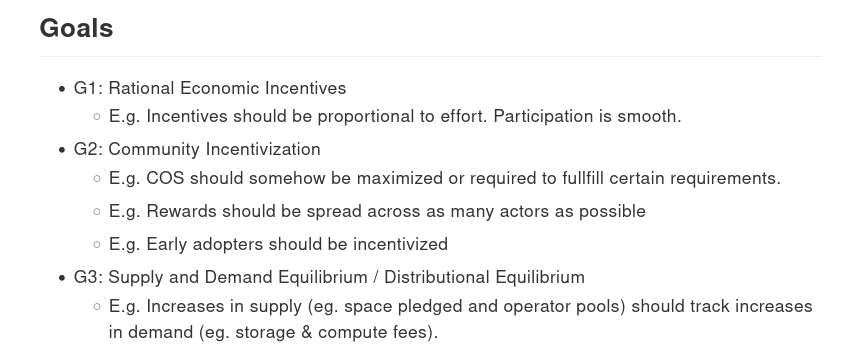

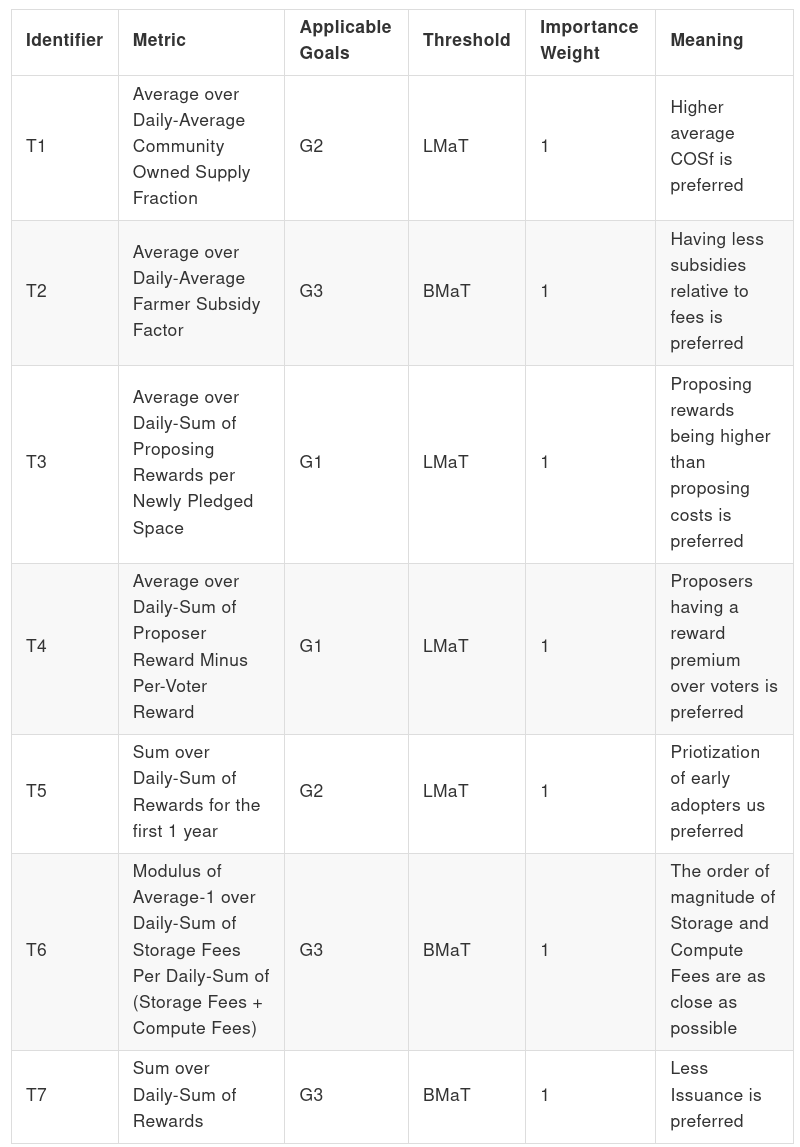

Create a set of governance surface parameters.

In [27]:
from subspace_model.params import GOVERNANCE_SURFACE

governance_surface_params = (set(GOVERNANCE_SURFACE.keys()) | {c for c in sim_df.columns if 'component' in c}) - {'reference_subsidy_components'}
governance_surface_params

{'reward_proposer_share', 'weight_to_fee'}

Create the aggregation column list.

In [28]:
trajectory_id_columns = ['simulation', 'subset', 'run']
agg_columns = trajectory_id_columns + list(governance_surface_params)
agg_columns

['simulation', 'subset', 'run', 'weight_to_fee', 'reward_proposer_share']

In [29]:
def trajectory_average_community_owned_supply_fraction(trajectory_df) -> float:
    return trajectory_df.community_owned_supply_fraction.mean()

def trajectory_average_farmer_subsidy_factor(trajectory_df) -> float:
    return trajectory_df.farmer_subsidy_factor.mean()

KPIs_per_trajectory = {
    'average_community_owned_supply_fraction': trajectory_average_community_owned_supply_fraction,
    'average_farmer_subsidy_factor': trajectory_average_farmer_subsidy_factor,
}

In [30]:
kpi_dfs = []
for kpi, kpi_f in KPIs_per_trajectory.items():
    kpi_s = sim_df.groupby(agg_columns).apply(kpi_f)
    kpi_s.name = kpi
    kpi_dfs.append(kpi_s)


all_kpi_df = pd.concat(kpi_dfs, axis=1)

In [31]:
all_kpi_df

average_community_owned_supply_fraction  \
simulation subset run weight_to_fee reward_proposer_share                                            
0          0      1   1.000000e-16  0.333333                                              0.379682   
                  2   1.000000e-16  0.333333                                              0.379682   
           1      1   1.000000e-15  0.333333                                              0.378116   
                  2   1.000000e-15  0.333333                                              0.378116   
           2      1   1.000000e-14  0.100000                                              0.381237   
...                                                                                            ...   
           45     2   1.000000e-16  0.333333                                              0.379682   
           46     1   1.000000e-18  0.100000                                              0.381237   
                  2   1.000000e-18  0.100000                                              0.381237   
           47     1   1.000000e-14  0.100000                                              0.381237   
                  2   1.000000e-14  0.100000                                              0.381237   

                                                           average_farmer_subsidy_factor  
simulation subset run weight_to_fee reward_proposer_share                                 
0          0      1   1.000000e-16  0.333333                                         1.0  
                  2   1.000000e-16  0.333333                                         1.0  
           1      1   1.000000e-15  0.333333                                         1.0  
                  2   1.000000e-15  0.333333                                         1.0  
           2      1   1.000000e-14  0.100000                                         1.0  
...                                                                                  ...  
           45     2   1.000000e-16  0.333333                                         1.0  
           46     1   1.000000e-18  0.100000                                         1.0  
                  2   1.000000e-18  0.100000                                         1.0  
           47     1   1.000000e-14  0.100000                                         1.0  
                  2   1.000000e-14  0.100000                                         1.0  

[96 rows x 2 columns]

array([[<Axes: title={'center': 'average_community_owned_supply_fraction'}>,
        <Axes: title={'center': 'average_farmer_subsidy_factor'}>]],
      dtype=object)

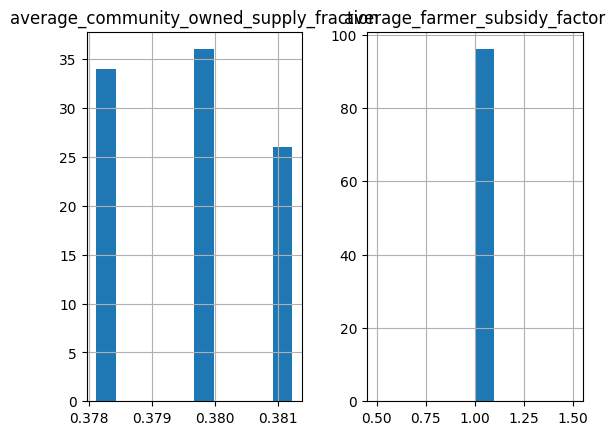

In [32]:
all_kpi_df.hist()

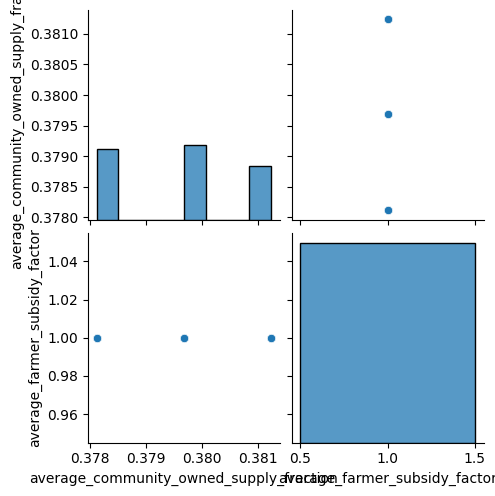

In [33]:
import seaborn as sns 
sns.pairplot(all_kpi_df.reset_index().drop(columns=trajectory_id_columns).drop(columns=list(governance_surface_params)))

In [34]:
threshold_df = all_kpi_df.copy(deep=True)


def transform_column_to_boolean_int(df, column_name, threshold_func):
    return threshold_func(df[column_name]).astype(int)

def threshold_greater_than_median(series):
    return series > series.median()

def threshold_less_than_median(series):
    return series < series.median()

threshold_per_KPI = {
    'average_community_owned_supply_fraction': threshold_greater_than_median,
    'average_farmer_subsidy_factor': threshold_less_than_median,
}

for kpi, func in threshold_per_KPI.items():
    threshold_df[kpi] = transform_column_to_boolean_int(all_kpi_df, kpi, func)


threshold_df

average_community_owned_supply_fraction  \
simulation subset run weight_to_fee reward_proposer_share                                            
0          0      1   1.000000e-16  0.333333                                                     0   
                  2   1.000000e-16  0.333333                                                     0   
           1      1   1.000000e-15  0.333333                                                     0   
                  2   1.000000e-15  0.333333                                                     0   
           2      1   1.000000e-14  0.100000                                                     1   
...                                                                                            ...   
           45     2   1.000000e-16  0.333333                                                     0   
           46     1   1.000000e-18  0.100000                                                     1   
                  2   1.000000e-18  0.100000                                                     1   
           47     1   1.000000e-14  0.100000                                                     1   
                  2   1.000000e-14  0.100000                                                     1   

                                                           average_farmer_subsidy_factor  
simulation subset run weight_to_fee reward_proposer_share                                 
0          0      1   1.000000e-16  0.333333                                           0  
                  2   1.000000e-16  0.333333                                           0  
           1      1   1.000000e-15  0.333333                                           0  
                  2   1.000000e-15  0.333333                                           0  
           2      1   1.000000e-14  0.100000                                           0  
...                                                                                  ...  
           45     2   1.000000e-16  0.333333                                           0  
           46     1   1.000000e-18  0.100000                                           0  
                  2   1.000000e-18  0.100000                                           0  
           47     1   1.000000e-14  0.100000                                           0  
                  2   1.000000e-14  0.100000                                           0  

[96 rows x 2 columns]

In [35]:
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

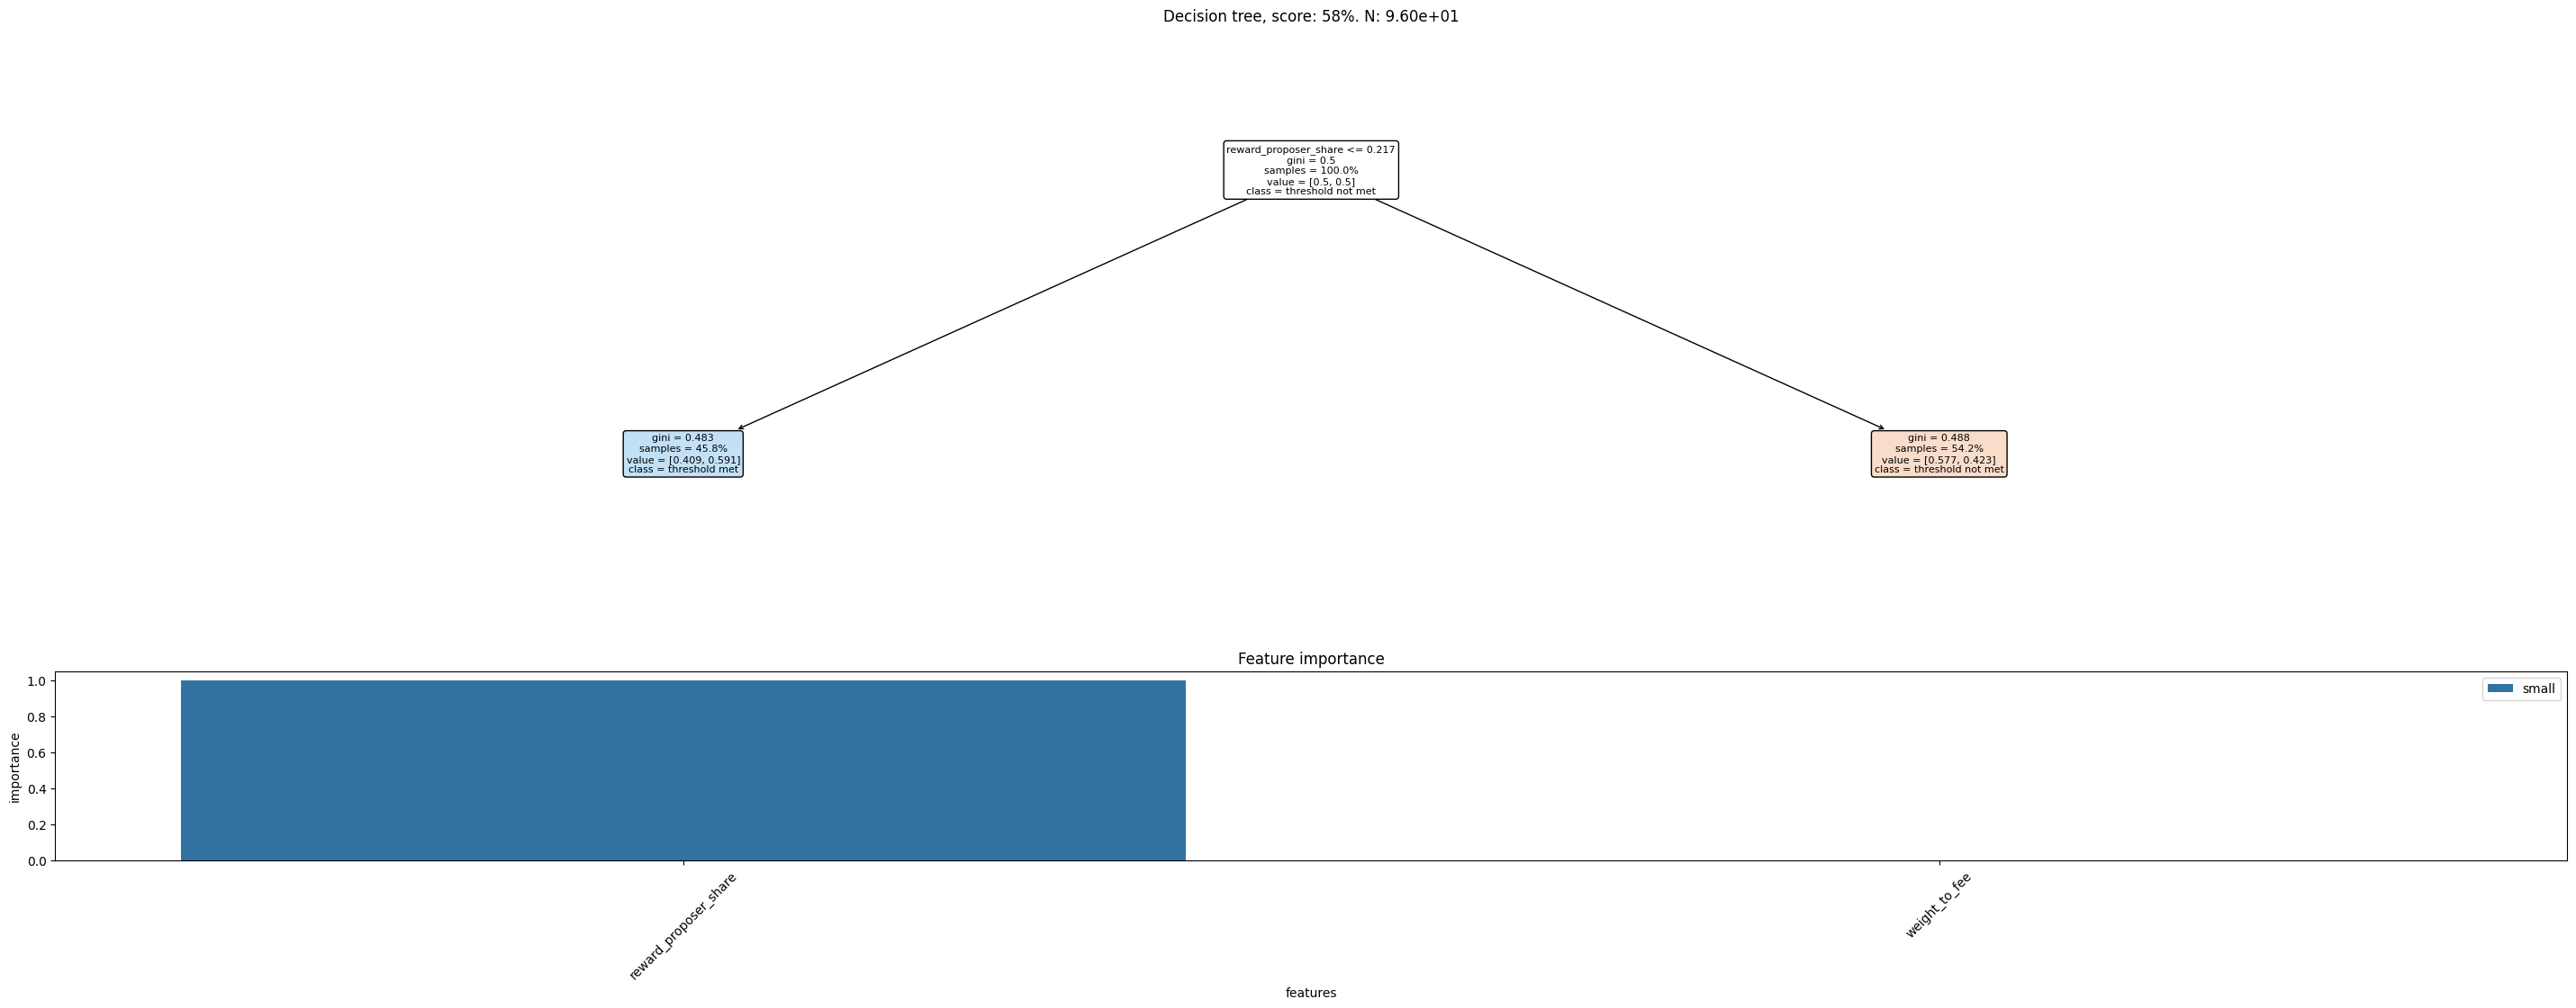

In [36]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


df = threshold_df.reset_index()
kpi = 'average_community_owned_supply_fraction'
features = list(set(governance_surface_params) - {kpi})
X = df.loc[:, features]
y = df.loc[:, kpi]

model = DecisionTreeClassifier(max_depth=3)
rf = RandomForestClassifier()
model.fit(X, y)
rf.fit(X, y)



rf_df = (pd.DataFrame(list(zip(X.columns, rf.feature_importances_)),
                    columns=['features', 'importance'])
        .sort_values(by='importance', ascending=False)
        )


fig, axes = plt.subplots(nrows=2,
                            figsize=(36, 12),
                            dpi=100,
                            gridspec_kw={'height_ratios': [3, 1]})

(ax_dt, ax_rf) = axes[0], axes[1]
plot_tree(model,
            rounded=True,
            proportion=True,
            fontsize=8,
            feature_names=X.columns,
            class_names=['threshold not met', 'threshold met'],
            filled=True,
            ax=ax_dt)
ax_dt.set_title(
    f'Decision tree, score: {model.score(X, y) :.0%}. N: {len(X) :.2e}')
sns.barplot(data=rf_df,
            x=rf_df.features,
            y=rf_df.importance,
            ax=ax_rf,
            label='small')
plt.setp(ax_rf.xaxis.get_majorticklabels(), rotation=45)
ax_rf.set_title(f'Feature importance')
plt.show()